In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pandas as pd

In [2]:
xrdsNorESMall_levs = xr.open_dataset("/share/sabl0586/all_stations_NorESM_OsloAero_prcp2szdst_f19_f19_noresmv211_corr_ilevall_levs_4Peter.nc")
SMRNorlevs =  xrdsNorESMall_levs.sel(station='SMR-II')
SMRNorlevs

<xarray.Dataset> Size: 158MB
Dimensions:             (time: 8761, lev: 32, ilev: 33)
Coordinates:
  * time                (time) datetime64[ns] 70kB 2012-01-02 ... 2015-01-01
    station             <U8 32B 'SMR-II'
  * lev                 (lev) float64 256B 3.643 7.595 14.36 ... 976.3 992.6
  * ilev                (ilev) float64 264B 2.255 5.032 10.16 ... 985.1 1e+03
Data variables: (12/275)
    ABSVIS              (time) float32 35kB ...
    ACTNI               (time) float32 35kB ...
    ACTNL               (time) float32 35kB ...
    ACTREI              (time) float32 35kB ...
    ACTREL              (time) float32 35kB ...
    AOD_VIS             (time) float32 35kB ...
    ...                  ...
    isoprene            (time, lev) float32 1MB ...
    monoterp            (time, lev) float32 1MB ...
    TOT_ICLD_VISTAU_s   (time) float32 35kB ...
    TOT_CLD_VISTAU_s    (time) float32 35kB ...
    optical_depth       (time) float32 35kB ...
    transmittance       (time) float32 35kB ...

In [3]:
SMRNorlevs

<xarray.Dataset> Size: 158MB
Dimensions:             (time: 8761, lev: 32, ilev: 33)
Coordinates:
  * time                (time) datetime64[ns] 70kB 2012-01-02 ... 2015-01-01
    station             <U8 32B 'SMR-II'
  * lev                 (lev) float64 256B 3.643 7.595 14.36 ... 976.3 992.6
  * ilev                (ilev) float64 264B 2.255 5.032 10.16 ... 985.1 1e+03
Data variables: (12/275)
    ABSVIS              (time) float32 35kB ...
    ACTNI               (time) float32 35kB ...
    ACTNL               (time) float32 35kB ...
    ACTREI              (time) float32 35kB ...
    ACTREL              (time) float32 35kB ...
    AOD_VIS             (time) float32 35kB ...
    ...                  ...
    isoprene            (time, lev) float32 1MB ...
    monoterp            (time, lev) float32 1MB ...
    TOT_ICLD_VISTAU_s   (time) float32 35kB ...
    TOT_CLD_VISTAU_s    (time) float32 35kB ...
    optical_depth       (time) float32 35kB ...
    transmittance       (time) float32 35kB ...

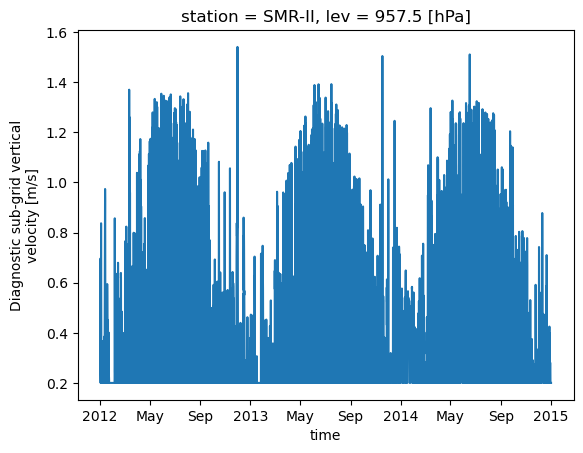

In [4]:
SMRNorlevs['WSUB'].isel(lev=-3).plot()

In [5]:
def NorExtract(Data):
    ds=xr.Dataset()
    for i in range(1,14):
        if f'SIGMA{i:02d}' not in Data:
            continue   
        a = Data[f'SIGMA{i:02d}']
        ds[f'SIGMA{i:02d}'] = a
        b = Data[f'NMR{i:02d}']
        ds[f'NMR{i:02d}'] = b
        c = Data[f'NCONC{i:02d}']
        ds[f'NCONC{i:02d}']=c
    ds['FREQL'] = Data['FREQL']
    ds['AWNC'] = Data['AWNC']
    ds['WSUB'] = Data['WSUB'] 
    ds['T'] = Data['T']
    return ds
        

In [6]:
ls_oa = ['SOA_NA', 'SOA_A1', 'OM_AC', 'OM_AI', 'OM_NI','SOA_NA_OCW', 'SOA_A1_OCW', 'OM_AC_OCW', 'OM_AI_OCW', 'OM_NI_OCW']
ls_so4 = ['SO4_NA', 'SO4_A1','SO4_A2','SO4_AC', 'SO4_PR','SO4_NA_OCW', 'SO4_A1_OCW','SO4_A2_OCW','SO4_AC_OCW', 'SO4_PR_OCW',]
ls_seasalt = ['SS_A1', 'SS_A2','SS_A1_OCW', 'SS_A2_OCW',]
ls_dust = ['DST_A2','DST_A2_OCW',]
Ls_bc = ['BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','BC_N_OCW','BC_AX_OCW','BC_NI_OCW','BC_A_OCW','BC_AI_OCW','BC_AC_OCW',]

In [7]:
#h2so4, (nh4)hso4, (nh4)2so4, OC, BC, dust, seasalt

In [8]:
Output=xr.Dataset()
Output = NorExtract(SMRNorlevs)

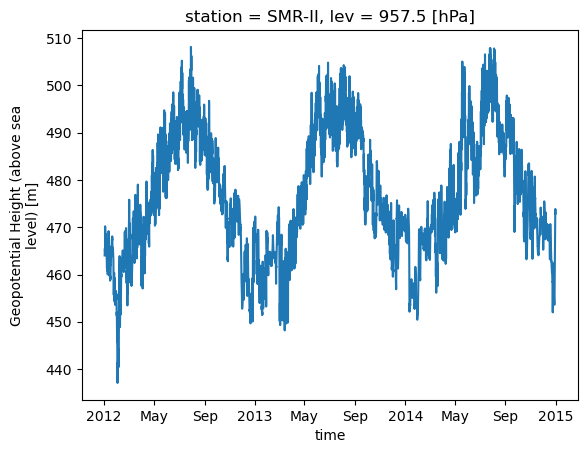

In [9]:
SMRNorlevs['Z3'].isel(lev = -3).plot()

In [10]:
!rm /share/pech2273/pech2273/SMRPeterVariables2.nc

Output.to_netcdf('/share/pech2273/SMRPeterVariables2.nc')


rm: cannot remove '/share/pech2273/pech2273/SMRPeterVariables2.nc': No such file or directory


In [11]:
dsECEarthallevs=xr.open_dataset("/share/sabl0586/all_stations_EC-Earth_PRCP2SZDST_ilevall_levs_4Peter.nc")
SMRECEarth = dsECEarthallevs.sel(station = 'SMR-II')
SMRECEarth

<xarray.Dataset> Size: 7GB
Dimensions:       (time: 61369, lev: 34, lev_ifs: 91)
Coordinates:
  * lev           (lev) float64 272B 1.0 2.0 3.0 4.0 5.0 ... 31.0 32.0 33.0 34.0
    station       <U8 32B 'SMR-II'
  * time          (time) datetime64[ns] 491kB 2012-01-01 ... 2019-01-01
    time_orig     (time) datetime64[ns] 491kB ...
  * lev_ifs       (lev_ifs) float64 728B 1.0 2.0 3.0 4.0 ... 88.0 89.0 90.0 91.0
Data variables: (12/80)
    CCN0.20       (time, lev) float32 8MB ...
    CCN1.00       (time, lev) float32 8MB ...
    GAS_ISOP      (time, lev) float32 8MB ...
    GAS_O3        (time, lev) float32 8MB ...
    GAS_OH        (time, lev) float32 8MB ...
    GAS_SO2       (time, lev) float32 8MB ...
    ...            ...
    var211        (time, lev) float32 8MB ...
    var22         (time, lev_ifs, lev) float32 760MB ...
    var239        (time, lev) float32 8MB ...
    var240        (time, lev) float32 8MB ...
    var248        (time, lev_ifs, lev) float32 760MB ...
    var54         (time, lev_ifs, lev) float32 760MB ...

In [12]:
diam_variables=['RDRY_NUS','RDRY_AIS','RDRY_ACS','RWET_AII','RDRY_COS','RWET_ACI','RWET_COI',]
Numb_variables = ['N_NUS','N_AIS','N_ACS','N_AII','N_COS','N_ACI','N_COI',]
ifs_vars = ['var130','var54','var131','var132','var20','var21','var22','var248']
ifs_vars_names = ['temp','pres','U','V','CDNC','re_liq','Liquid_Cloud_time','Cloud_Frac']

In [13]:
ds_ifs=xr.Dataset()

SMRECEarth['lev']=SMRECEarth['pressure'].mean('time')
for ifs in ifs_vars:
    ds_ifs[ifs] = SMRECEarth[ifs]
ds_ifs = ds_ifs[['var130','var54','var131','var132','var132','var20','var21','var22','var248']].isel(lev=0).drop_vars('lev')
ds_ifs['lev_ifs'] = ds_ifs['var54'].mean('time')
for ifs in ifs_vars:
    ds_ifs[ifs] = ds_ifs.sel(lev_ifs = SMRECEarth['lev'], method='nearest')[ifs]

    
ds_ifs = ds_ifs.drop_vars('lev_ifs')
ds_ifs['lev'] = ds_ifs['lev']/100
    

In [14]:
ds_ifs 

<xarray.Dataset> Size: 68MB
Dimensions:    (time: 61369, lev: 34)
Coordinates:
    station    <U8 32B 'SMR-II'
  * time       (time) datetime64[ns] 491kB 2012-01-01 ... 2019-01-01
    time_orig  (time) datetime64[ns] 491kB ...
  * lev        (lev) float32 136B 998.9 987.3 964.2 ... 1.405 0.4877 0.1071
Data variables:
    var130     (time, lev) float32 8MB ...
    var54      (time, lev) float32 8MB nan nan nan nan nan ... nan nan nan nan
    var131     (time, lev) float32 8MB ...
    var132     (time, lev) float32 8MB ...
    var20      (time, lev) float32 8MB ...
    var21      (time, lev) float32 8MB ...
    var22      (time, lev) float32 8MB ...
    var248     (time, lev) float32 8MB ...

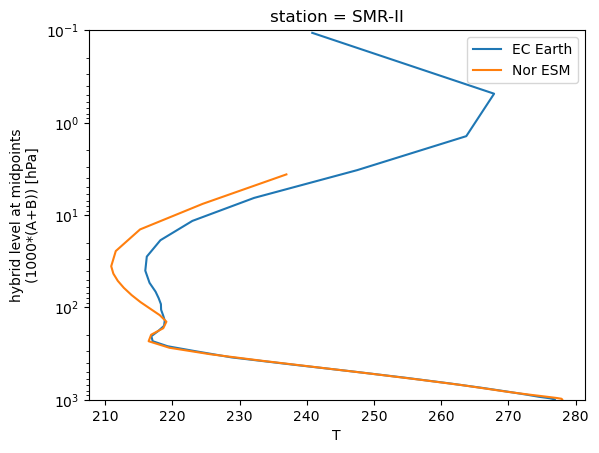

In [15]:
ds_ifs['var130'].dropna('time').mean('time').plot(y = 'lev', yscale = 'log', ylim = [1000,.1], label= 'EC Earth')
Output['T'].mean('time').plot(y = 'lev', label = 'Nor ESM')
plt.legend()

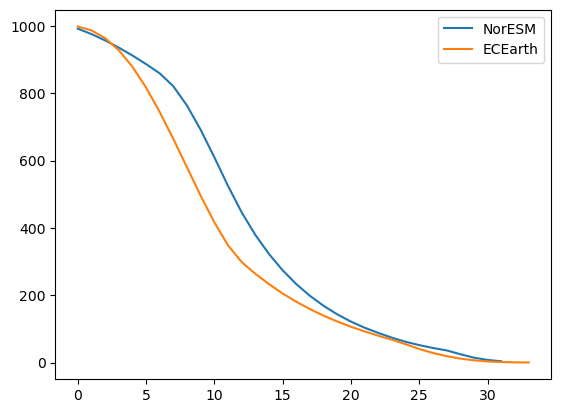

In [16]:
z = SMRNorlevs['lev'].to_numpy()
z = np.flip(z)
plt.plot(z, label = 'NorESM')
plt.plot(SMRECEarth['lev']/100, label = 'ECEarth')
plt.legend()

In [17]:
def ECextract (Data):
    ds=xr.Dataset()
    for i in range(0,len(diam_variables)):
        a = Data[f'{diam_variables[i]}']
        ds[f'{diam_variables[i]}'] = a
        b = Data[f'{Numb_variables[i]}']
        ds[f'{Numb_variables[i]}'] = b
    ds['lev'] = ds['lev']/100    
    #ds['CDNC'] = Data['var20']
    #ds = ds.drop_vars('lev_ifs')
    #ds['TotalCloudCover'] = Data['var164']
    #ds['CloudCoverFrac'] = Data['var248']
    #ds['CloudTime'] = Data['var22']
    #ds['pressure'] = Data['pressure']
    return ds

In [18]:
OutputEC = ECextract(SMRECEarth)

In [19]:
OutputEC['lev']

<xarray.DataArray 'lev' (lev: 34)> Size: 136B
array([9.989239e+02, 9.873262e+02, 9.642048e+02, 9.284984e+02, 8.791235e+02,
       8.170485e+02, 7.444158e+02, 6.641813e+02, 5.796158e+02, 4.951083e+02,
       4.165654e+02, 3.481359e+02, 2.983976e+02, 2.637693e+02, 2.328131e+02,
       2.051556e+02, 1.805182e+02, 1.586307e+02, 1.390280e+02, 1.217363e+02,
       1.062767e+02, 9.239895e+01, 7.959546e+01, 6.773937e+01, 5.430088e+01,
       4.012578e+01, 2.825970e+01, 1.878179e+01, 1.160182e+01, 6.543725e+00,
       3.278289e+00, 1.404692e+00, 4.876789e-01, 1.070704e-01], dtype=float32)
Coordinates:
  * lev      (lev) float32 136B 998.9 987.3 964.2 928.5 ... 1.405 0.4877 0.1071
    station  <U8 32B 'SMR-II'

!rm /share/pech2273/SMRECEARTHPeterVariables2.nc

In [20]:
!rm /share/pech2273/SMRECEARTHPeterVariables.nc
!rm /share/pech2273/SMRECEARTHPeterVariablesIFS.nc
OutputEC.to_netcdf('/share/pech2273/SMRECEARTHPeterVariables.nc')
ds_ifs.to_netcdf('/share/pech2273/SMRECEARTHPeterVariablesIFS.nc')

In [21]:
NORls_oa = ['SOA_NA', 'SOA_A1', 'OM_AC', 'OM_AI', 'OM_NI','SOA_NA_OCW', 'SOA_A1_OCW', 'OM_AC_OCW', 'OM_AI_OCW', 'OM_NI_OCW']
NORls_so4 = ['SO4_NA', 'SO4_A1','SO4_A2','SO4_AC', 'SO4_PR','SO4_NA_OCW', 'SO4_A1_OCW','SO4_A2_OCW','SO4_AC_OCW', 'SO4_PR_OCW',]
NORls_seasalt = ['SS_A1', 'SS_A2','SS_A1_OCW', 'SS_A2_OCW',]
NORls_dust = ['DST_A2','DST_A2_OCW',]
NORls_bc = ['BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','BC_N_OCW','BC_NI_OCW','BC_A_OCW','BC_AI_OCW','BC_AC_OCW',]#'BC_AX_OCW',
ECls_oa = ['M_SOANUS','M_POMAIS','M_SOAAIS','M_POMACS','M_SOAACS','M_POMAII', 'M_SOAAII',]
ECls_so4 = ['M_SO4NUS','M_SO4ACS',] #'M_SO4AIS'
ECls_seasalt= ['M_SSACS'] 
ECls_dust = ['M_DUACI','M_DUACS'] 
ECls_bc = ['M_BCACS','M_BCAII','M_BCAIS',] 

In [22]:
M_SO4AIS_es =(SMRECEarth['M_SO4ACS']/(SMRECEarth['M_BCACS']+SMRECEarth['M_POMACS']+SMRECEarth['M_SOAACS']))*(SMRECEarth['M_BCAIS']+SMRECEarth['M_POMAIS']+SMRECEarth['M_SOAAIS'])

In [23]:
M_SO4AIS_es

<xarray.DataArray (time: 61369, lev: 34)> Size: 8MB
array([[9.9468543e-14, 2.6053698e-13, 5.6198346e-13, ..., 4.1977971e-16,
        2.6763335e-16, 1.8906282e-17],
       [7.5686507e-14, 2.4183986e-13, 5.1271449e-13, ..., 4.0317437e-16,
        2.6973611e-16, 1.8974182e-17],
       [6.5907756e-14, 2.2951636e-13, 4.7747613e-13, ..., 4.0031330e-16,
        2.6793561e-16, 1.9218155e-17],
       ...,
       [5.3983781e-13, 5.4792537e-13, 5.2292160e-13, ..., 5.4931876e-16,
        3.6535244e-17, 2.9339079e-18],
       [5.4074556e-13, 5.4909056e-13, 5.3212166e-13, ..., 5.4028415e-16,
        3.6023511e-17, 2.8779715e-18],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], shape=(61369, 34), dtype=float32)
Coordinates:
  * lev        (lev) float32 136B 9.989e+04 9.873e+04 9.642e+04 ... 48.77 10.71
    station    <U8 32B 'SMR-II'
  * time       (time) datetime64[ns] 491kB 2012-01-01 ... 2019-01-01
    time_orig  (time) datetime64[ns] 491kB 2012-01-01T00:30:00 ... NaT

In [24]:
NorBCMass = sum(SMRNorlevs[i] for i in NORls_bc)
NorOAMass = sum(SMRNorlevs[i] for i in NORls_oa)
NorSO4Mass = sum(SMRNorlevs[i] for i in NORls_so4)
NorSeasaltMass = sum(SMRNorlevs[i] for i in NORls_seasalt)
NorDustMass = sum(SMRNorlevs[i] for i in NORls_dust)
Norls_Mass = [NorBCMass,  NorOAMass, NorSO4Mass, NorSeasaltMass, NorDustMass] 


In [25]:
ECBCMass = sum(SMRECEarth[i] for i in ECls_bc)
ECOAMass = sum(SMRECEarth[i] for i in ECls_oa)
ECSO4Mass = sum(SMRECEarth[i] for i in ECls_so4)+M_SO4AIS_es
ECSeasaltMass = sum(SMRECEarth[i] for i in ECls_seasalt)
ECDustMass = sum(SMRECEarth[i] for i in ECls_dust)
ECls_Mass = [ECBCMass,  ECOAMass, ECSO4Mass, ECSeasaltMass, ECDustMass] 
#MassSOCAI = MassSO4ACS*RatioVolume(AIK/ACC)

In [26]:
NorBCMassFrac = NorBCMass/sum( i for i in Norls_Mass)
NorOAMassFrac = NorOAMass/sum( i for i in Norls_Mass)
NorSO4MassFrac = NorSO4Mass/sum( i for i in Norls_Mass)
NorSeasaltMassFrac = NorSeasaltMass/sum( i for i in Norls_Mass)
NorDustMassFrac = NorDustMass/sum( i for i in Norls_Mass)


In [27]:
ECBCMassFrac = ECBCMass/sum( i for i in ECls_Mass)
ECOAMassFrac = ECOAMass/sum( i for i in ECls_Mass)
ECSO4MassFrac = ECSO4Mass/sum( i for i in ECls_Mass)
ECSeasaltMassFrac = ECSeasaltMass/sum( i for i in ECls_Mass)
ECDustMassFrac = ECDustMass/sum( i for i in ECls_Mass)

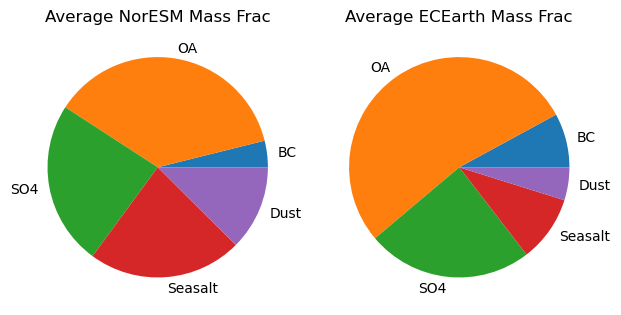

In [28]:
plt.subplot(1,2,1)
plt.pie(x = [NorBCMassFrac.isel(lev = -1).mean('time'), NorOAMassFrac.isel(lev = -1).mean('time'), NorSO4MassFrac.isel(lev = -1).mean('time'), NorSeasaltMassFrac.isel(lev = -1).mean('time'), NorDustMassFrac.isel(lev = -1).mean('time')], labels = ['BC','OA','SO4','Seasalt','Dust'])
plt.title('Average NorESM Mass Frac')
plt.subplot(1,2,2)
plt.pie(x = [ECBCMassFrac.isel(lev = 0).mean('time'), ECOAMassFrac.isel(lev = 0).mean('time'), ECSO4MassFrac.isel(lev = 0).mean('time'), ECSeasaltMassFrac.isel(lev = 0).mean('time'), ECDustMassFrac.isel(lev = 0).mean('time')], labels = ['BC','OA','SO4','Seasalt','Dust'])
plt.title('Average ECEarth Mass Frac')
plt.tight_layout()
plt.show()

In [29]:
ECMassFrac_ds = xr.Dataset({'BCMassFrac' : ECBCMassFrac, 'OAMassFrac' :ECOAMassFrac,'SO4MassFrac' : ECSO4MassFrac, 'SeasaltMassFrac' :ECSeasaltMassFrac, 'DustMassFrac' :ECDustMassFrac,\
                            'BCMass' : ECBCMass, 'OAMass' :ECOAMass,'SO4Mass' : ECSO4Mass, 'SeasaltMass' :ECSeasaltMass, 'DustMass' :ECDustMass})

In [30]:
NorMassFrac_ds = xr.Dataset({'BCMassFrac' : NorBCMassFrac, 'OAMassFrac' :NorOAMassFrac,'SO4MassFrac' : NorSO4MassFrac, 'SeasaltMassFrac' :NorSeasaltMassFrac, 'DustMassFrac' :NorDustMassFrac,\
                            'BCMass' : NorBCMass, 'OAMass' :NorOAMass,'SO4Mass' : NorSO4Mass, 'SeasaltMass' :NorSeasaltMass, 'DustMass' :NorDustMass}) 

In [31]:
!rm /share/pech2273/ECMassFrac.nc
!rm /share/pech2273/NorMassFrac.nc
ECMassFrac_ds.to_netcdf('/share/pech2273/ECMassFrac.nc')
NorMassFrac_ds.to_netcdf('/share/pech2273/NorMassFrac.nc')

In [ ]:
Obs_ds = xr.open_dataset("/share/nibe4885/obs_SMEAR_II_Niels.nc")